## EXTENDED PLAN
Norfolk is a county in Massachusetts. It is currently made up of one city and twenty seven towns. The population of the county is 703,740 and the employed population (as of 2020) is 376,643.

**INTERESTS:**
1. I am interested in finding out how COVID 19 had an impact on the employment rate in the county. 
2. I would like to understand how many unemployment claims were filed during 2019-2020, 
3. whether there is any correlation between the unemployment rates and COVID-19, 
4. and if so how COVID 19 affected different genders, races, education levels, ethnicities. 
5. impact of masking enforcements on the employment/ unemployment rates. 

**YEARS:**
Comparision of 2020 and 2021
 
**TASKS:**
- [x] Find Demographic Data for Norfolk
- [x] Plot the populations of demographic to understand what kind of population we are dealing with
- [x] Import Labor and UnEmployment file and plot the time series of number of employed/unemployed and labor force.
- [x] Plot covid cases time series with the above data. Is there any trend?
- [x] Plot with mask mandates. Is there any trend
- [x] Import unemployment claims file for Norfolk
- [x] Plot it across months
- [x] Plot it with covid data and mask mandate data
- [ ] further analysis

**Demographic Data Sources:**
- Race & Ethnicity: https://data.census.gov/table?g=0500000US25021&tid=ACSDT1Y2019.B03002
- Age and Sex: https://data.census.gov/table?g=0500000US25021&tid=ACSST5Y2019.S0101
- Education: https://data.census.gov/table?tid=ACSST5Y2020.S1501&g=0500000US25021

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.legend import Legend
plt.rcParams.update({'font.size': 20})
sns.set()

In [8]:
employment20 = pd.read_csv("../raw/EmpAndWage2020.csv")
employment21 = pd.read_csv("../raw/EmpAndWage2021.csv")

In [9]:
employment20.head()

,NAICS,Description,No. of Establishments,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Total Wages,Average Monthly Employment,Average Weekly Wages
0,10,"Total, All Industries","25,787","350,221","346,420","344,288","277,657","285,126","300,280","304,917","310,257","315,997","322,722","324,742","324,260","$23,710,826,539","317,241","$1,437"
1,101,Goods-Producing,"2,940","42,556","42,366","42,441","33,761","36,642","40,606","41,080","41,601","41,274","41,701","41,780","41,445","$3,633,617,607","40,604","$1,721"
2,1011,Natural Resources and Mining,48,"1,043","1,036","1,073","1,077",951,"1,098","1,116","1,118","1,077","1,073","1,027","1,045","$42,660,288","1,061",$773
3,11,"Agriculture, Forestry, Fishing and Hunting",41,993,989,"1,021","1,030",895,"1,040","1,057","1,060","1,022","1,021",978,998,"$38,805,431","1,009",$740
4,111,Crop production,18,928,914,949,958,820,965,984,990,954,955,917,929,"$35,963,939",939,$737


In [10]:
employment21.head()

,NAICS,Description,No. of Establishments,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Total Wages,Average Monthly Employment,Average Weekly Wages
0,10,"Total, All Industries","26,884","318,052","317,333","320,733","328,620","330,962","335,850","333,173","332,905","333,387","339,449","341,412","341,805","$25,394,327,738","331,139","$1,475"
1,101,Goods-Producing,"3,023","40,185","40,004","40,628","41,767","42,403","43,173","43,803","43,779","43,263","43,781","43,727","43,444","$3,912,172,077","42,510","$1,770"
2,1011,Natural Resources and Mining,54,984,964,"1,007",993,"1,084","1,164","1,240","1,239","1,213","1,211","1,172","1,174","$49,600,555","1,131",$843
3,11,"Agriculture, Forestry, Fishing and Hunting",46,940,920,961,939,"1,036","1,110","1,182","1,183","1,154","1,156","1,116","1,119","$45,695,092","1,078",$815
4,111,Crop production,18,858,838,880,870,963,"1,032","1,094","1,102","1,075","1,079","1,036","1,034","$41,310,889",989,$803


In [11]:
employment20.shape

(751, 18)

In [12]:
employment20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAICS                       750 non-null    object
 1   Description                 748 non-null    object
 2   No. of Establishments       748 non-null    object
 3   Jan-20                      748 non-null    object
 4   Feb-20                      748 non-null    object
 5   Mar-20                      748 non-null    object
 6   Apr-20                      748 non-null    object
 7   May-20                      748 non-null    object
 8   Jun-20                      748 non-null    object
 9   Jul-20                      748 non-null    object
 10  Aug-20                      748 non-null    object
 11  Sep-20                      748 non-null    object
 12  Oct-20                      748 non-null    object
 13  Nov-20                      748 non-null    object

In [13]:
employment21.shape

(748, 18)

In [14]:
employment21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAICS                       748 non-null    object
 1   Description                 748 non-null    object
 2   No. of Establishments       748 non-null    object
 3   Jan-21                      748 non-null    object
 4   Feb-21                      748 non-null    object
 5   Mar-21                      748 non-null    object
 6   Apr-21                      748 non-null    object
 7   May-21                      748 non-null    object
 8   Jun-21                      748 non-null    object
 9   Jul-21                      748 non-null    object
 10  Aug-21                      748 non-null    object
 11  Sep-21                      748 non-null    object
 12  Oct-21                      748 non-null    object
 13  Nov-21                      748 non-null    object

In [15]:
employment20.drop(employment20.index[1:],inplace=True)
employment21.drop(employment21.index[1:],inplace=True)

In [16]:
employment20 = employment20.T
employment21 = employment21.T

In [17]:
employment20.columns = ['Numbers']
employment21.columns = ['Numbers']

In [18]:
employment20 = employment20.iloc[3:15,:]
employment21 = employment21.iloc[3:15,:]

In [19]:
employment = employment20.append(employment21)

C:\Users\getan\AppData\Local\Temp\ipykernel_3296\185890614.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employment = employment20.append(employment21)


In [20]:
employment.head()

,Numbers
Jan-20,"350,221"
Feb-20,"346,420"
Mar-20,"344,288"
Apr-20,"277,657"
May-20,"285,126"


In [21]:
employment.replace(',','', regex=True, inplace=True)

In [22]:
employment['Numbers'] = employment['Numbers'].astype(str).astype(int)

In [23]:
employment.reset_index(inplace=True)

In [24]:
employment['index'] = pd.to_datetime(employment['index'], format="%b-%y") 

In [25]:
employment.head()

,index,Numbers
0,2020-01-01,350221
1,2020-02-01,346420
2,2020-03-01,344288
3,2020-04-01,277657
4,2020-05-01,285126


In [26]:
employment.to_csv("../processed/consolidatedEmpReport.csv")

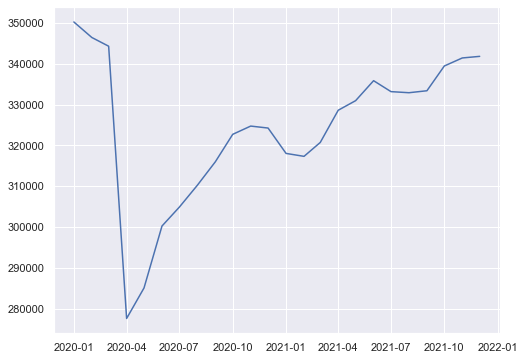

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(employment['index'],employment['Numbers'])

#### UNEMPLOYMENT CLAIMS DATA

In [28]:
claims = pd.read_excel("../intermediate/UnEmploymentClaims_Norfolk.xlsx", header=[0,1])

In [29]:
claims.head()

CONTINUED CLAIMS                        GENDER                 RACE  \
  Week-Ending Date     County_Name Claims   Male Female Unknown White   
0       2020-01-04  Norfolk County   5265   3425   1838     NaN  3818   
1       2020-01-11  Norfolk County   5092   3369   1721     NaN  3749   
2       2020-01-18  Norfolk County   5085   3374   1709     NaN  3760   
3       2020-01-25  Norfolk County   5062   3396   1664     NaN  3774   
4       2020-02-01  Norfolk County   5132   3461   1669     NaN  3841   

                                                                    ...  \
  Black or African American Asian American Indian or Alaska Native  ...   
0                       588   349                                9  ...   
1                       501   342                               11  ...   
2                       503   323                               12  ...   
3                       487   305                               10  ...   
4                       487   305                               12  ...   

                             SOC OCCUPATION                                    \
  39  Personal Care and Service Occupations 41  Sales and Related Occupations   
0                                       125                               267   
1                                       131                               297   
2                                       137                               287   
3                                       132                               280   
4                                       138                               285   

                                                     \
  43  Office and Administrative Support Occupations   
0                                               496   
1                                               483   
2                                               494   
3                                               488   
4                                               482   

                                                  \
  45  Farming, Fishing, and Forestry Occupations   
0                                             18   
1                                             20   
2                                             21   
3                                             23   
4                                             23   

                                               \
  47  Construction and Extraction Occupations   
0                                         979   
1                                        1022   
2                                        1018   
3                                        1030   
4                                        1068   

                                                         \
  49  Installation, Maintenance, and Repair Occupations   
0                                                135      
1                                                144      
2                                                149      
3                                                154      
4                                                151      

                              \
  51  Production Occupations   
0                        126   
1                        117   
2                        121   
3                        118   
4                        129   

                                                      \
  53  Transportation and Material Moving Occupations   
0                                                557   
1                                                282   
2                                                270   
3                                                277   
4                                                295   

                                                 
  55  Military Specific Occupations 99  Unknown  
0                                 *          13  
1                                 *          11  
2                                 *          13  
3                  

In [30]:
claims = claims[claims.columns[0:21]]

In [31]:
claims.columns = claims.columns.map(' '.join)

In [32]:
claims.head()

,CONTINUED CLAIMS Week-Ending Date,CONTINUED CLAIMS County_Name,CONTINUED CLAIMS Claims,GENDER Male,GENDER Female,GENDER Unknown,RACE White,RACE Black or African American,RACE Asian,RACE American Indian or Alaska Native,...,RACE Race Unknown,ETHNICITY Not Hispanic,ETHNICITY Hispanic,ETHNICITY N/A,EDUCATION Less than a High School Diploma,EDUCATION High School or GED,EDUCATION Some College or Associate Degree,EDUCATION Bachelor's Degree,EDUCATION Master's Degree or Higher,EDUCATION Education Info Not Available
0,2020-01-04,Norfolk County,5265,3425,1838,NaN,3818,588,349,9,...,486,4662,266,337,191,1895,1403,1201,569,6
1,2020-01-11,Norfolk County,5092,3369,1721,NaN,3749,501,342,11,...,472,4509,266,317,192,1801,1319,1222,552,6
2,2020-01-18,Norfolk County,5085,3374,1709,NaN,3760,503,323,12,...,469,4493,277,315,189,1806,1302,1205,579,*
3,2020-01-25,Norfolk County,5062,3396,1664,NaN,3774,487,305,10,...,470,4477,277,308,193,1794,1297,1210,563,5
4,2020-02-01,Norfolk County,5132,3461,1669,NaN,3841,487,305,12,...,472,4546,282,304,193,1851,1308,1209,567,*


In [33]:
claims.rename(columns={'CONTINUED CLAIMS Week-Ending Date':'Date','CONTINUED CLAIMS County_Name':'County_Name','CONTINUED CLAIMS Claims':'Claims'}, inplace=True)

In [34]:
claims.columns = claims.columns.str.lower()

In [35]:
claims.head()

,date,county_name,claims,gender male,gender female,gender unknown,race white,race black or african american,race asian,race american indian or alaska native,...,race race unknown,ethnicity not hispanic,ethnicity hispanic,ethnicity n/a,education less than a high school diploma,education high school or ged,education some college or associate degree,education bachelor's degree,education master's degree or higher,education education info not available
0,2020-01-04,Norfolk County,5265,3425,1838,NaN,3818,588,349,9,...,486,4662,266,337,191,1895,1403,1201,569,6
1,2020-01-11,Norfolk County,5092,3369,1721,NaN,3749,501,342,11,...,472,4509,266,317,192,1801,1319,1222,552,6
2,2020-01-18,Norfolk County,5085,3374,1709,NaN,3760,503,323,12,...,469,4493,277,315,189,1806,1302,1205,579,*
3,2020-01-25,Norfolk County,5062,3396,1664,NaN,3774,487,305,10,...,470,4477,277,308,193,1794,1297,1210,563,5
4,2020-02-01,Norfolk County,5132,3461,1669,NaN,3841,487,305,12,...,472,4546,282,304,193,1851,1308,1209,567,*


In [36]:
claims.to_csv('../processed/claims_demographic.csv')

Text(0, 0.5, 'No.of claims')

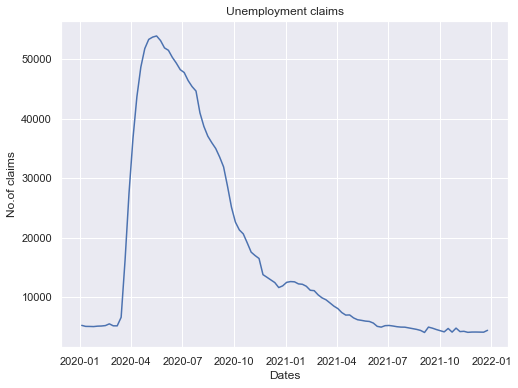

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(claims['date'],claims['claims'])
plt.title('Unemployment claims')
plt.xlabel('Dates')
plt.ylabel('No.of claims')

Text(0, 0.5, 'No.of claims')

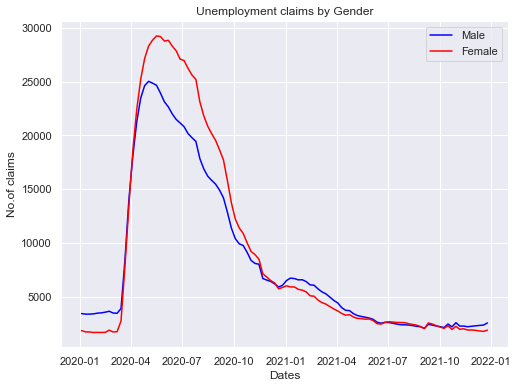

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(claims['date'],claims['gender male'], color = 'blue', label="Male")
ax.plot(claims['date'],claims['gender female'], color = 'red', label="Female")
ax.legend()
plt.title('Unemployment claims by Gender')
plt.xlabel('Dates')
plt.ylabel('No.of claims')

Text(0, 0.5, 'No.of claims')

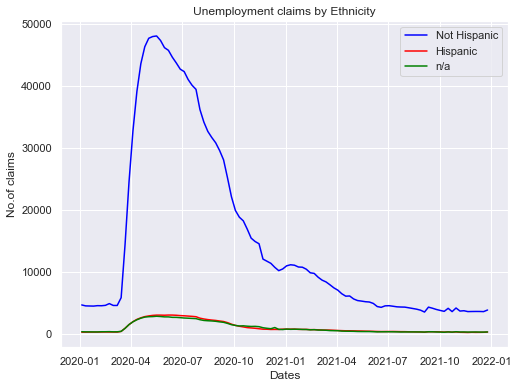

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(claims['date'],claims['ethnicity not hispanic'], color = 'blue', label="Not Hispanic")
ax.plot(claims['date'],claims['ethnicity hispanic'], color = 'red', label="Hispanic")
ax.plot(claims['date'],claims['ethnicity n/a'], color = 'green', label="n/a")
ax.legend()
plt.title('Unemployment claims by Ethnicity')
plt.xlabel('Dates')
plt.ylabel('No.of claims')

Text(0, 0.5, 'No.of claims')

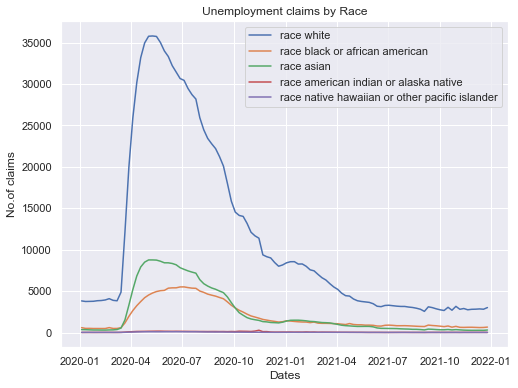

In [40]:
race = claims[claims.columns[6:11]]
labels = claims.columns[6:11]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(claims['date'],race,label =labels)
ax.legend()
plt.title('Unemployment claims by Race')
plt.xlabel('Dates')
plt.ylabel('No.of claims')

Text(0, 0.5, 'No.of claims')

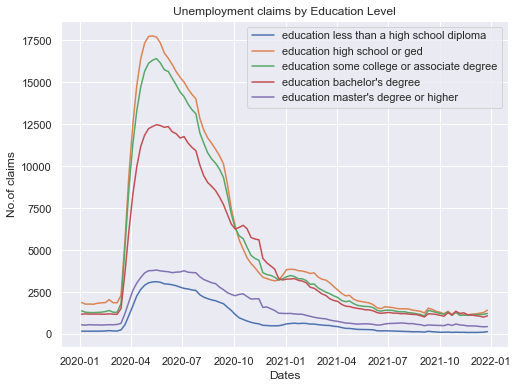

In [41]:
education = claims[claims.columns[15:-1]]
labs = claims.columns[15:-1]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(claims['date'],education,label =labs)
ax.legend()
plt.title('Unemployment claims by Education Level')
plt.xlabel('Dates')
plt.ylabel('No.of claims')

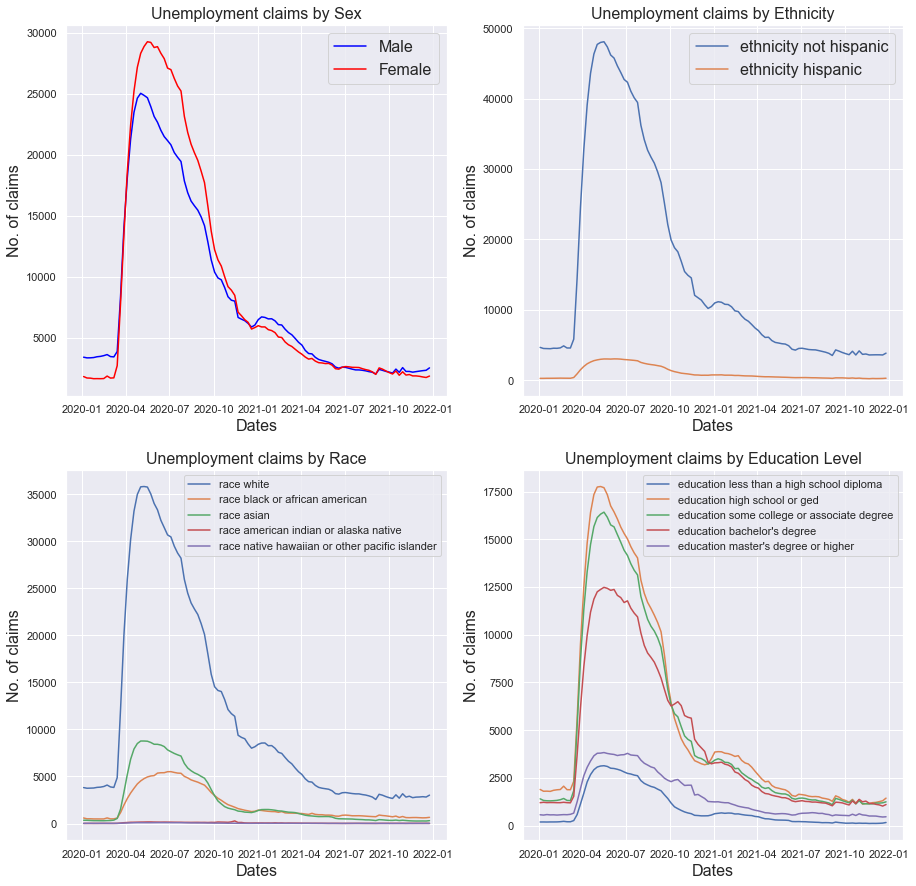

In [42]:
fig, axs = plt.subplots(2, 2,figsize=(15, 15))
#fig.suptitle('Umemployment claims by Demographics',fontsize=18)

axs[0, 0].plot(claims['date'],claims['gender male'], color = 'blue', label="Male")
axs[0, 0].plot(claims['date'],claims['gender female'], color = 'red', label="Female")
axs[0, 0].legend(prop={'size': 16})
axs[0, 0].set_title('Unemployment claims by Sex',fontsize=16)

ethnicity = claims[claims.columns[12:14]]
labels01 = claims.columns[12:14]
axs[0, 1].plot(claims['date'],ethnicity, label=labels01)
axs[0, 1].set_title('Unemployment claims by Ethnicity',fontsize=16)
axs[0, 1].legend(prop={'size': 16})

race = claims[claims.columns[6:11]]
labels10 = claims.columns[6:11]
axs[1, 0].plot(claims['date'],race,label =labels10)
axs[1, 0].set_title('Unemployment claims by Race',fontsize=16)
axs[1, 0].legend(prop={'size': 11})

education = claims[claims.columns[15:-1]]
labels11 = claims.columns[15:-1]
axs[1, 1].plot(claims['date'],education,label =labels11)
axs[1, 1].set_title('Unemployment claims by Education Level',fontsize=16)
axs[1, 1].legend(prop={'size': 11})

for ax in axs.flat:
    ax.set_xlabel('Dates', fontsize = 16)
    ax.set_ylabel('No. of claims', fontsize=16)

plt.savefig('2.png',facecolor="white")

#### PLOTTING DATA FOR DEMOGRAPHIC PROPORTION

In [43]:
gender_population = pd.read_csv("../intermediate/gender.csv")
race_population = pd.read_csv("../intermediate/race.csv")
ethnicity_population = pd.read_csv("../intermediate/ethnicity.csv")

In [44]:
claims['year'], claims['month'] = claims['date'].dt.year, claims['date'].dt.month_name(locale = 'English')

In [45]:
claims['male_prop'] = claims['gender male']/gender_population.loc[0,'MALE']
claims['male_prop'] = np.where(claims['year']==2021, claims['gender male']/gender_population.loc[1,'MALE'], claims['male_prop'])

claims['female_prop'] = claims['gender female']/gender_population.loc[0,'FEMALE']
claims['female_prop'] = np.where(claims['year']==2021, claims['gender female']/gender_population.loc[1,'FEMALE'], claims['female_prop'])

In [46]:
claims['white_prop'] = claims['race white']/race_population.loc[0,'White']
claims['white_prop'] = np.where(claims['year']==2021, claims['race white']/race_population.loc[1,'White'], claims['white_prop'])

claims['black_prop'] = claims['race black or african american']/race_population.loc[0,'Black or African American']
claims['black_prop'] = np.where(claims['year']==2021, claims['race black or african american']/race_population.loc[1,'Black or African American'], claims['black_prop'])

claims['asian_prop'] = claims['race asian']/race_population.loc[0,'Asian']
claims['asian_prop'] = np.where(claims['year']==2021, claims['race asian']/race_population.loc[1,'Asian'], claims['asian_prop'])

claims['ai_prop'] = claims['race american indian or alaska native']/race_population.loc[0,'American Indian and Alaska Native']
claims['ai_prop'] = np.where(claims['year']==2021, claims['race american indian or alaska native']/race_population.loc[1,'American Indian and Alaska Native'], claims['ai_prop'])

claims['nh_prop'] = claims['race native hawaiian or other pacific islander']/race_population.loc[0,'Native Hawaiian and Other Pacific Islander']
claims['nh_prop'] = np.where(claims['year']==2021, claims['race native hawaiian or other pacific islander']/race_population.loc[1,'Native Hawaiian and Other Pacific Islander'], claims['nh_prop'])

In [47]:
claims['not_hispanic_prop'] = claims['ethnicity not hispanic']/ethnicity_population.loc[0,'Not Hispanic or Latino']
claims['not_hispanic_prop'] = np.where(claims['year']==2021, claims['ethnicity not hispanic']/ethnicity_population.loc[1,'Not Hispanic or Latino'], claims['not_hispanic_prop'])

claims['hispanic_prop'] = claims['ethnicity hispanic']/ethnicity_population.loc[0,'Hispanic or Latino']
claims['hispanic_prop'] = np.where(claims['year']==2021, claims['ethnicity hispanic']/ethnicity_population.loc[1,'Hispanic or Latino'], claims['hispanic_prop'])

In [48]:
claims.head()

,date,county_name,claims,gender male,gender female,gender unknown,race white,race black or african american,race asian,race american indian or alaska native,...,month,male_prop,female_prop,white_prop,black_prop,asian_prop,ai_prop,nh_prop,not_hispanic_prop,hispanic_prop
0,2020-01-04,Norfolk County,5265,3425,1838,NaN,3818,588,349,9,...,January,0.010110,0.005036,0.007127,0.011642,0.004373,0.008815,0.056818,0.006953,0.007997
1,2020-01-11,Norfolk County,5092,3369,1721,NaN,3749,501,342,11,...,January,0.009945,0.004715,0.006998,0.009919,0.004285,0.010774,0.064394,0.006725,0.007997
2,2020-01-18,Norfolk County,5085,3374,1709,NaN,3760,503,323,12,...,January,0.009960,0.004683,0.007019,0.009959,0.004047,0.011753,0.068182,0.006701,0.008328
3,2020-01-25,Norfolk County,5062,3396,1664,NaN,3774,487,305,10,...,January,0.010024,0.004559,0.007045,0.009642,0.003821,0.009794,0.060606,0.006677,0.008328
4,2020-02-01,Norfolk County,5132,3461,1669,NaN,3841,487,305,12,...,February,0.010216,0.004573,0.007170,0.009642,0.003821,0.011753,0.056818,0.006780,0.008478


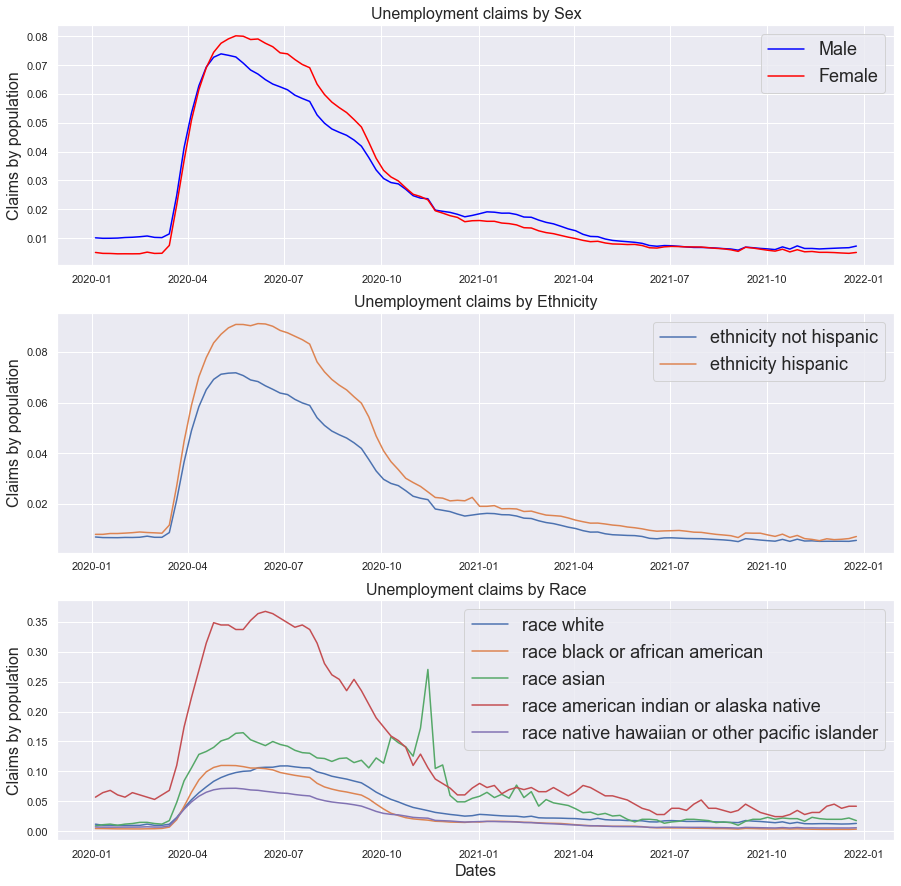

In [49]:
fig, (axs1, axs2, axs3) = plt.subplots(3,figsize=(15, 15))
#fig.suptitle('Umemployment claims by Demographics',fontsize=18)

axs1.plot(claims['date'],claims['male_prop'], color = 'blue', label="Male")
axs1.plot(claims['date'],claims['female_prop'], color = 'red', label="Female")
axs1.legend(prop={'size': 18})
axs1.set_title('Unemployment claims by Sex',fontsize=16)
axs1.set_ylabel('Claims by population',fontsize=16)

ethnicity = claims[claims.columns[30:]]
labels01 = claims.columns[12:14]
axs2.plot(claims['date'],ethnicity, label=labels01)
axs2.set_title('Unemployment claims by Ethnicity',fontsize=16)
axs2.set_ylabel('Claims by population',fontsize=16)
axs2.legend(prop={'size': 18})

race = claims[claims.columns[26:31]]
labels10 = claims.columns[6:11]
axs3.plot(claims['date'],race,label =labels10)
axs3.set_title('Unemployment claims by Race',fontsize=16)
axs3.set_xlabel('Dates',fontsize=16)
axs3.set_ylabel('Claims by population',fontsize=16)
axs3.legend(prop={'size': 18})
plt.savefig("1.png",facecolor="white")

#### CONVERTING CLAIMS WEEKLY DATA TO MONTHLY DATA FOR EACH DEMOGRAPHIC

In [50]:
claims_monthly = claims.set_index('date').resample('M').agg(
    {'gender male':'mean','gender female':'mean','race white':'mean',
    'race black or african american':'mean', 'race asian':'mean',
    'race american indian or alaska native':'mean',
    'race native hawaiian or other pacific islander':'mean',
    'ethnicity not hispanic':'mean','ethnicity hispanic':'mean',
    'education less than a high school diploma':'mean',
    'education high school or ged':'mean',
    'education some college or associate degree':'mean',
    'education bachelor\'s degree':'mean','education master\'s degree or higher':'mean'}).reset_index()

In [51]:
claims_monthly.head()

,date,gender male,gender female,race white,race black or african american,race asian,race american indian or alaska native,race native hawaiian or other pacific islander,ethnicity not hispanic,ethnicity hispanic,education less than a high school diploma,education high school or ged,education some college or associate degree,education bachelor's degree,education master's degree or higher
0,2020-01-31,3391.00,1733.00,3775.25,519.75,329.75,10.50,16.50,4535.25,271.5,191.25,1824.00,1330.25,1209.5,565.75
1,2020-02-29,3523.60,1720.00,3923.00,508.60,305.80,13.60,15.40,4626.80,288.6,204.20,1914.60,1346.40,1207.8,567.20
2,2020-03-31,7443.75,6450.50,10212.75,1047.00,1434.25,41.25,27.25,12353.50,764.5,543.50,4811.75,4243.25,3141.5,1108.00
3,2020-04-30,21877.25,23357.25,31063.25,3459.50,7107.25,129.50,76.25,40463.50,2414.0,2398.00,15265.50,13758.50,10340.0,3178.25
4,2020-05-31,24337.00,28891.40,35272.60,4877.80,8662.00,160.60,90.60,47464.80,2981.6,3088.00,17459.60,16158.80,12373.4,3790.20


In [52]:
claims_monthly['year'], claims_monthly['month'] = claims_monthly['date'].dt.year, claims_monthly['date'].dt.month_name(locale = 'English')

In [53]:
gender_population = pd.read_csv("../intermediate/gender.csv")
race_population = pd.read_csv("../intermediate/race.csv")
ethnicity_population = pd.read_csv("../intermediate/ethnicity.csv")

In [54]:
claims_monthly['male_prop'] = claims_monthly['gender male']/gender_population.loc[0,'MALE']
claims_monthly['male_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['gender male']/gender_population.loc[1,'MALE'], claims_monthly['male_prop'])

claims_monthly['female_prop'] = claims_monthly['gender female']/gender_population.loc[0,'FEMALE']
claims_monthly['female_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['gender female']/gender_population.loc[1,'FEMALE'], claims_monthly['female_prop'])

In [55]:
claims_monthly['white_prop'] = claims_monthly['race white']/race_population.loc[0,'White']
claims_monthly['white_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['race white']/race_population.loc[1,'White'], claims_monthly['white_prop'])

claims_monthly['black_prop'] = claims_monthly['race black or african american']/race_population.loc[0,'Black or African American']
claims_monthly['black_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['race black or african american']/race_population.loc[1,'Black or African American'], claims_monthly['black_prop'])

claims_monthly['asian_prop'] = claims_monthly['race asian']/race_population.loc[0,'Asian']
claims_monthly['asian_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['race asian']/race_population.loc[1,'Asian'], claims_monthly['asian_prop'])

claims_monthly['ai_prop'] = claims_monthly['race american indian or alaska native']/race_population.loc[0,'American Indian and Alaska Native']
claims_monthly['ai_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['race american indian or alaska native']/race_population.loc[1,'American Indian and Alaska Native'], claims_monthly['ai_prop'])

claims_monthly['nh_prop'] = claims_monthly['race native hawaiian or other pacific islander']/race_population.loc[0,'Native Hawaiian and Other Pacific Islander']
claims_monthly['nh_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['race native hawaiian or other pacific islander']/race_population.loc[1,'Native Hawaiian and Other Pacific Islander'], claims_monthly['nh_prop'])

In [56]:
claims_monthly['not_hispanic_prop'] = claims_monthly['ethnicity not hispanic']/ethnicity_population.loc[0,'Not Hispanic or Latino']
claims_monthly['not_hispanic_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['ethnicity not hispanic']/ethnicity_population.loc[1,'Not Hispanic or Latino'], claims_monthly['not_hispanic_prop'])

claims_monthly['hispanic_prop'] = claims_monthly['ethnicity hispanic']/ethnicity_population.loc[0,'Hispanic or Latino']
claims_monthly['hispanic_prop'] = np.where(claims_monthly['year']==2021, claims_monthly['ethnicity hispanic']/ethnicity_population.loc[1,'Hispanic or Latino'], claims_monthly['hispanic_prop'])

In [57]:
claims_monthly.head()

,date,gender male,gender female,race white,race black or african american,race asian,race american indian or alaska native,race native hawaiian or other pacific islander,ethnicity not hispanic,ethnicity hispanic,...,month,male_prop,female_prop,white_prop,black_prop,asian_prop,ai_prop,nh_prop,not_hispanic_prop,hispanic_prop
0,2020-01-31,3391.00,1733.00,3775.25,519.75,329.75,10.50,16.50,4535.25,271.5,...,January,0.010010,0.004748,0.007047,0.010290,0.004132,0.010284,0.062500,0.006764,0.008162
1,2020-02-29,3523.60,1720.00,3923.00,508.60,305.80,13.60,15.40,4626.80,288.6,...,February,0.010401,0.004713,0.007323,0.010070,0.003832,0.013320,0.058333,0.006901,0.008677
2,2020-03-31,7443.75,6450.50,10212.75,1047.00,1434.25,41.25,27.25,12353.50,764.5,...,March,0.021973,0.017674,0.019064,0.020729,0.017970,0.040402,0.103220,0.018425,0.022984
3,2020-04-30,21877.25,23357.25,31063.25,3459.50,7107.25,129.50,76.25,40463.50,2414.0,...,April,0.064578,0.063998,0.057984,0.068494,0.089050,0.126836,0.288826,0.060350,0.072575
4,2020-05-31,24337.00,28891.40,35272.60,4877.80,8662.00,160.60,90.60,47464.80,2981.6,...,May,0.071839,0.079161,0.065842,0.096575,0.108530,0.157297,0.343182,0.070792,0.089640


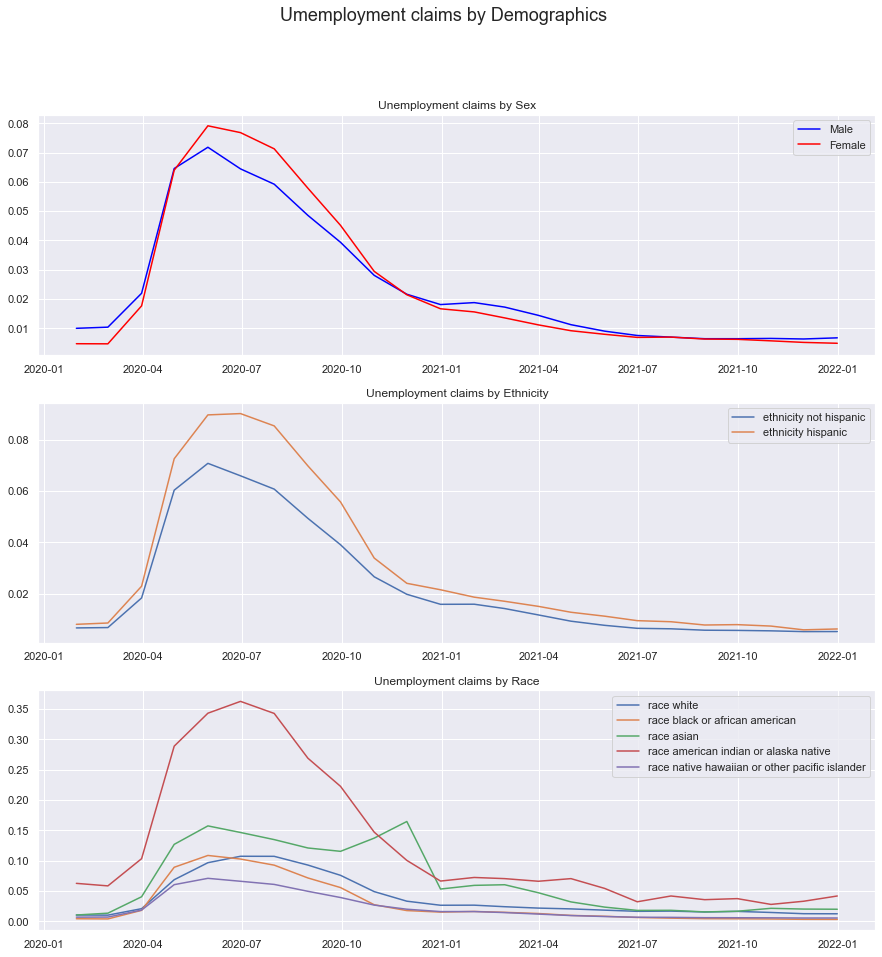

In [58]:
fig, (axs1, axs2, axs3) = plt.subplots(3,figsize=(15, 15))
fig.suptitle('Umemployment claims by Demographics',fontsize=18)

axs1.plot(claims_monthly['date'],claims_monthly['male_prop'], color = 'blue', label="Male")
axs1.plot(claims_monthly['date'],claims_monthly['female_prop'], color = 'red', label="Female")
axs1.legend()
axs1.set_title('Unemployment claims by Sex')

ethnicity = claims_monthly[claims_monthly.columns[24:]]
labels01 = claims.columns[12:14]
axs2.plot(claims_monthly['date'],ethnicity, label=labels01)
axs2.set_title('Unemployment claims by Ethnicity')
axs2.legend()

race = claims_monthly[claims_monthly.columns[20:25]]
labels10 = claims.columns[6:11]
axs3.plot(claims_monthly['date'],race,label =labels10)
axs3.set_title('Unemployment claims by Race')
axs3.legend()

for ax in axs.flat:
    ax.set(xlabel='Dates', ylabel='No.of claims')

In [59]:
gender = claims.iloc[:,[0,3,4]]

In [60]:
gender.head()

,date,gender male,gender female
0,2020-01-04,3425,1838
1,2020-01-11,3369,1721
2,2020-01-18,3374,1709
3,2020-01-25,3396,1664
4,2020-02-01,3461,1669


In [61]:
gender_monthly = gender.set_index('date').resample('M').agg({'gender male':'mean','gender female':'mean'}).reset_index()

In [62]:
gender_monthly['year'], gender_monthly['month'] = gender_monthly['date'].dt.year, gender_monthly['date'].dt.month_name(locale = 'English')

In [63]:
gender_monthly.head()

,date,gender male,gender female,year,month
0,2020-01-31,3391.00,1733.00,2020,January
1,2020-02-29,3523.60,1720.00,2020,February
2,2020-03-31,7443.75,6450.50,2020,March
3,2020-04-30,21877.25,23357.25,2020,April
4,2020-05-31,24337.00,28891.40,2020,May


In [64]:
gender_population = pd.read_csv("../intermediate/gender.csv")

In [65]:
gender_population.head()

,YEAR,MALE,FEMALE
0,2020,338772,364968
1,2021,351745,372760


In [66]:
gender_monthly['male_prop'] = gender_monthly['gender male']/gender_population.loc[0,'MALE']
gender_monthly['male_prop'] = np.where(gender_monthly['year']==2021, gender_monthly['gender male']/gender_population.loc[1,'MALE'], gender_monthly['male_prop'])
gender_monthly['female_prop'] = gender_monthly['gender female']/gender_population.loc[0,'FEMALE']
gender_monthly['female_prop'] = np.where(gender_monthly['year']==2021, gender_monthly['gender female']/gender_population.loc[1,'FEMALE'], gender_monthly['female_prop'])

In [67]:
gender_monthly.tail()

,date,gender male,gender female,year,month,male_prop,female_prop
19,2021-08-31,2273.00,2365.25,2021,August,0.006462,0.006345
20,2021-09-30,2272.00,2328.25,2021,September,0.006459,0.006246
21,2021-10-31,2306.00,2135.80,2021,October,0.006556,0.005730
22,2021-11-30,2239.00,1937.75,2021,November,0.006365,0.005198
23,2021-12-31,2376.75,1827.25,2021,December,0.006757,0.004902


Text(0, 0.5, 'Proportion of population')

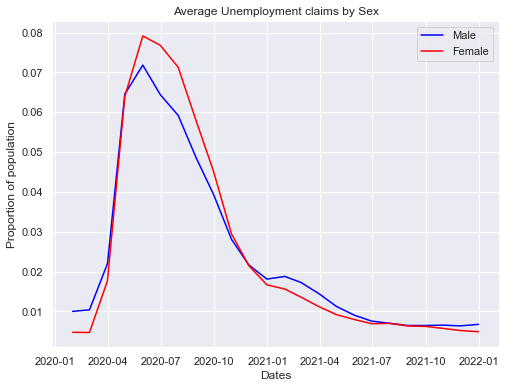

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(gender_monthly['date'],gender_monthly['male_prop'], color = 'blue', label="Male")
ax.plot(gender_monthly['date'],gender_monthly['female_prop'], color = 'red', label="Female")
ax.legend()
plt.title('Average Unemployment claims by Sex')
plt.xlabel('Dates')
plt.ylabel('Proportion of population')

#### CHANGE POINT DETECTION

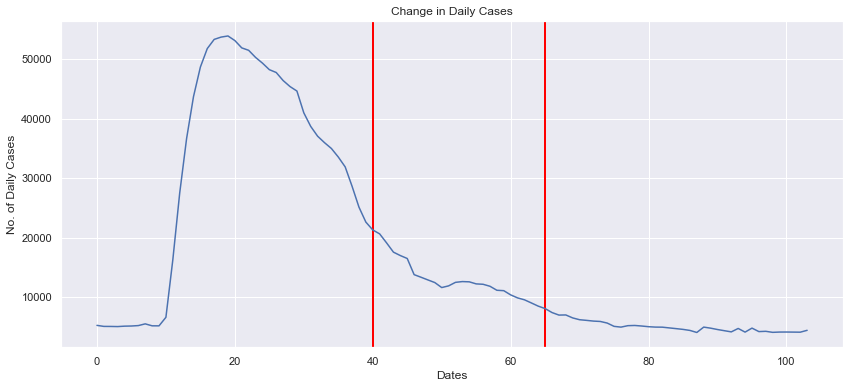

In [69]:
# Plotting change point detection in daily cases
import ruptures as rpt
total = claims.loc[:, ["date","claims"]]
total.set_index("date",drop=False)
points = np.array(total['claims'])
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
result = total.iloc[result[:-1]].index.to_list()
plt.figure(figsize=(14, 6))
for x in result:
    plt.axvline(x,lw=2, color='red')
#rpt.display(points, result)
plt.plot(total['claims'])
plt.xlabel('Dates')
plt.ylabel('No. of Daily Cases')
plt.title('Change in Daily Cases')
plt.show()  

#### NORFOLK COUNTY COVID CASES

In [70]:
cases = pd.read_csv("../raw/RAW_us_confirmed_cases.csv")
norfolk = cases[(cases['Province_State']=='Massachusetts') & (cases['Admin2']=='Norfolk')]
norfolk_df = norfolk.melt(id_vars=list(norfolk.columns[0:11]), 
                          value_vars=list(norfolk.columns[11:]),
                          var_name = "Date", value_name="no_of_cases", ignore_index=True)
norfolk_df["Date"] = pd.to_datetime(norfolk_df["Date"])
norfolk_df = norfolk_df.set_index("Date", drop=False)
norfolk_df = norfolk_df[norfolk_df.columns[11:]]
norfolk_df = norfolk_df[(norfolk_df["Date"] >= "2020-01-01") & (norfolk_df["Date"] < "2022-01-01")]

In [71]:
norfolk_df.tail()

,Date,no_of_cases
Date,,
2021-12-27,2021-12-27,80210
2021-12-28,2021-12-28,81213
2021-12-29,2021-12-29,82736
2021-12-30,2021-12-30,84862
2021-12-31,2021-12-31,86849


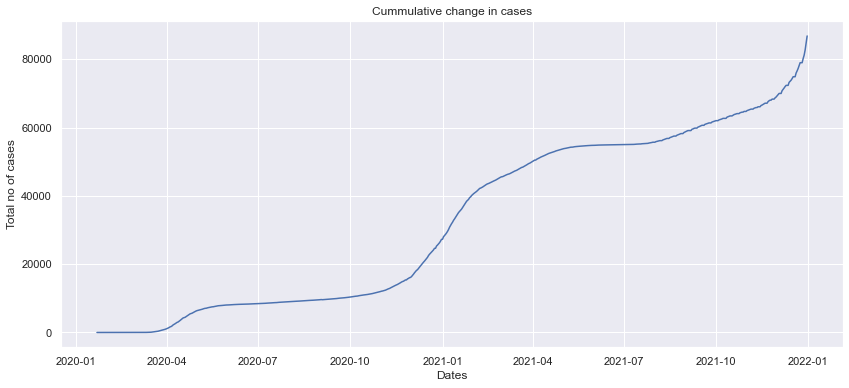

In [72]:
# Plotting the change in monthly cases 
plt.figure(figsize=(14,6))
plt.plot(norfolk_df['no_of_cases'])
plt.xlabel('Dates')
plt.ylabel('Total no of cases')
plt.title('Cummulative change in cases')
plt.show()

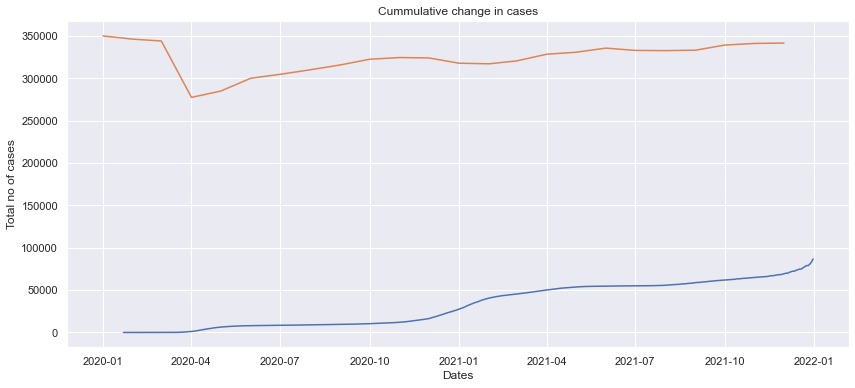

In [73]:
# Plotting the change in cummulative cases 
plt.figure(figsize=(14,6))
plt.plot(norfolk_df['no_of_cases'])
plt.plot(employment['index'],employment['Numbers'])
plt.xlabel('Dates')
plt.ylabel('Total no of cases')
plt.title('Cummulative change in cases')
plt.show()

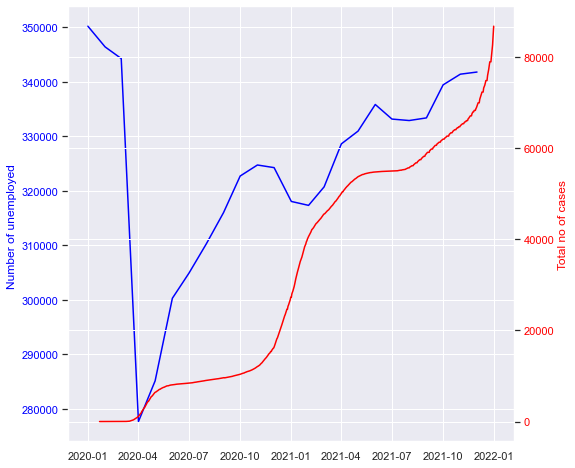

In [74]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax2.plot(norfolk_df['no_of_cases'], color="red")
ax2.set_xlabel('Dates')
ax2.set_ylabel('Total no of cases', color = "red")
ax2.tick_params(axis="y", labelcolor="red")

ax1.plot(employment['index'],employment['Numbers'], color="blue")
ax1.set_ylabel('Number of unemployed ', color = "blue")
ax1.tick_params(axis="y", labelcolor="blue")


#### LABOR AND UNEMPLOYMENT ANALYSIS

In [75]:
labor = pd.read_csv("../intermediate/LaborAndUnEmp.csv")

In [76]:
labor.head()

,Year,Month,Labor Force,Employed,Unemployed,Area Rate,Massachusetts Rate
0,2021,January,386547,360991,25556,6.6,7.7
1,2021,February,387691,363342,24349,6.3,7.2
2,2021,March,388680,365881,22799,5.9,6.7
3,2021,April,387671,366547,21124,5.4,6.1
4,2021,May,386745,366366,20379,5.3,5.8


In [77]:
labor['date'] = labor['Month']+"-"+labor["Year"].astype(str)

In [78]:
labor.head()

,Year,Month,Labor Force,Employed,Unemployed,Area Rate,Massachusetts Rate,date
0,2021,January,386547,360991,25556,6.6,7.7,January-2021
1,2021,February,387691,363342,24349,6.3,7.2,February-2021
2,2021,March,388680,365881,22799,5.9,6.7,March-2021
3,2021,April,387671,366547,21124,5.4,6.1,April-2021
4,2021,May,386745,366366,20379,5.3,5.8,May-2021


In [79]:
# Removing Annual rows
labor = labor[labor.Month != "Annual"]

In [80]:
labor['date'] = pd.to_datetime(labor['date'])

In [81]:
labor.head()

,Year,Month,Labor Force,Employed,Unemployed,Area Rate,Massachusetts Rate,date
0,2021,January,386547,360991,25556,6.6,7.7,2021-01-01
1,2021,February,387691,363342,24349,6.3,7.2,2021-02-01
2,2021,March,388680,365881,22799,5.9,6.7,2021-03-01
3,2021,April,387671,366547,21124,5.4,6.1,2021-04-01
4,2021,May,386745,366366,20379,5.3,5.8,2021-05-01


In [82]:
labor = labor.sort_values(by=['date'])

Text(0, 0.5, 'Labor Force')

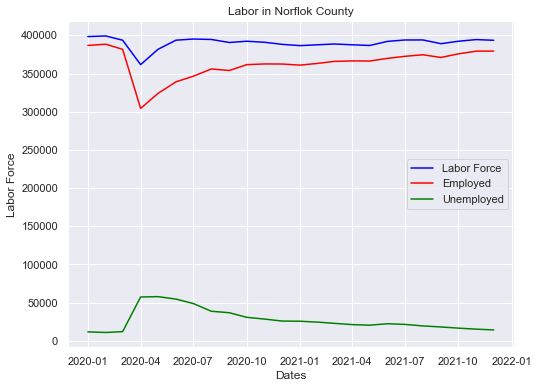

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labor['date'],labor['Labor Force'], color = 'blue', label="Labor Force")
ax.plot(labor['date'],labor['Employed'], color = 'red', label="Employed")
ax.plot(labor['date'],labor['Unemployed'], color = 'green', label="Unemployed")
ax.legend()
plt.title('Labor in Norflok County')
plt.xlabel('Dates')
plt.ylabel('Labor Force')

Text(0, 0.5, 'Labor Force')

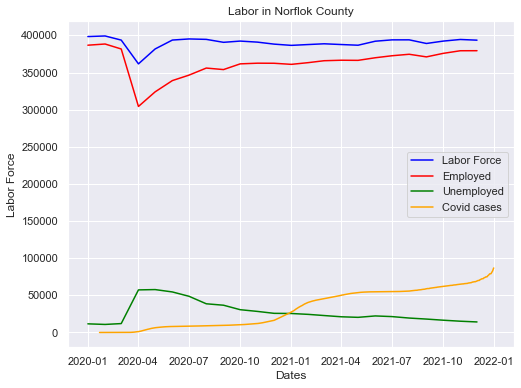

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labor['date'],labor['Labor Force'], color = 'blue', label="Labor Force")
ax.plot(labor['date'],labor['Employed'], color = 'red', label="Employed")
ax.plot(labor['date'],labor['Unemployed'], color = 'green', label="Unemployed")
plt.plot(norfolk_df['no_of_cases'], color = 'orange', label="Covid cases")
ax.legend()
plt.title('Labor in Norflok County')
plt.xlabel('Dates')
plt.ylabel('Labor Force')

Text(0.5, 0, 'Dates')

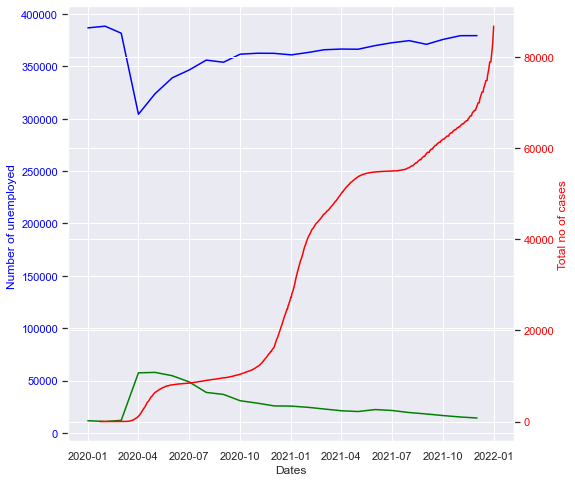

In [85]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax2.plot(norfolk_df['no_of_cases'], color="red")
ax2.set_ylabel('Total no of cases', color = "red")
ax2.tick_params(axis="y", labelcolor="red")

ax1.plot(labor['date'],labor['Employed'], color = 'blue', label="Employed")
ax1.plot(labor['date'],labor['Unemployed'], color = 'green', label="Unemployed")
ax1.set_ylabel('Number of unemployed ', color = "blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel('Dates')


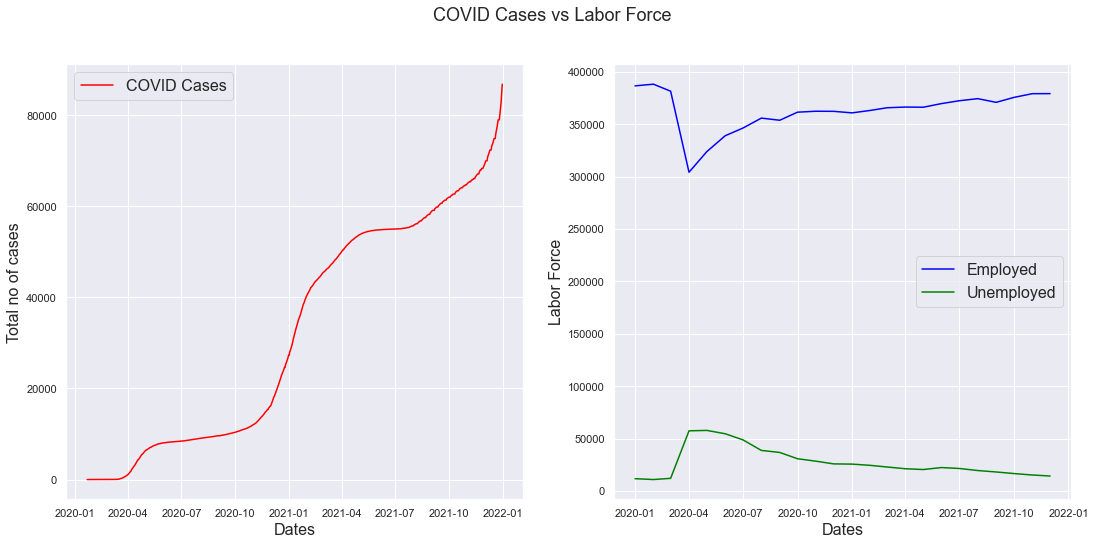

In [86]:
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(18, 8))
plt.suptitle('COVID Cases vs Labor Force',fontsize=18)
axs1.plot(norfolk_df['no_of_cases'], color="red", label="COVID Cases")
axs1.set_ylabel('Total no of cases',fontsize=16)
#axs1.tick_params(axis="y", labelcolor="red")
axs1.set_xlabel('Dates',fontsize=16)
axs1.legend(prop={'size': 16})

axs2.plot(labor['date'],labor['Employed'], color = 'blue', label="Employed")
axs2.plot(labor['date'],labor['Unemployed'], color = 'green', label="Unemployed")
axs2.set_ylabel('Labor Force', fontsize=16)
#axs2.tick_params(axis="y", labelcolor="blue")
axs2.set_xlabel('Dates', fontsize=16)
axs2.legend(prop={'size': 16})
plt.savefig("3.png",facecolor="white")

#### TYING IT UP TO MASK ENFORCEMENT

In [87]:
mask_mandates = pd.read_csv("../raw/Mask_Mandates.csv")
norfolk_mandates = mask_mandates[(mask_mandates['County_Name']=='Norfolk County')]
norfolk_mandates = norfolk_mandates.fillna("No")

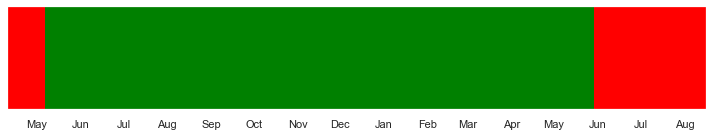

In [88]:
# Plotting the Masking Mandate Policies 
fig, ax = plt.subplots(figsize=(10,2))
masks_yes = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="Yes"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_yes.date))
times=list(zip(inxval, np.ones(len(masks_yes))))
plt.broken_barh(times, (-1,1), color = "green")

masks_no = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="No"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_no.date))
times=list(zip(inxval, np.ones(len(masks_no))))
plt.broken_barh(times, (-1,1), color = "red")

ax.margins(0)
ax.set_yticks([])
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b"))
plt.tight_layout()
plt.show()

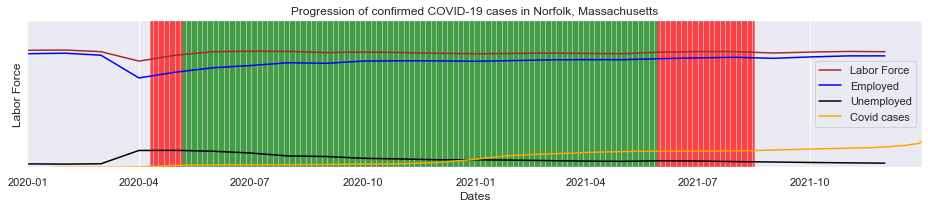

In [89]:
fig, ax = plt.subplots(figsize=(13,3))
masks_yes = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="Yes"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_yes.date))
times=list(zip(inxval, np.ones(len(masks_yes))))
plt.broken_barh(times, (0, 500000), color = "green", alpha = 0.35)

masks_no = norfolk_mandates[norfolk_mandates['Face_Masks_Required_in_Public']=="No"]
inxval = matplotlib.dates.date2num(pd.to_datetime(masks_no.date))
times=list(zip(inxval, np.ones(len(masks_no))))
plt.broken_barh(times, (0, 500000), color = "red", alpha=0.35)

legend_drawn_flag = True
ax.legend(["Mask Mandates enforced", "Mask Mandates not enforced"], loc=0, bbox_to_anchor=(1.0, 0.25),
           frameon=legend_drawn_flag)
    
ax.margins(0)
ax.set_yticks([])
plt.plot(labor['date'],labor['Labor Force'], color = 'brown', label="Labor Force")
plt.plot(labor['date'],labor['Employed'], color = 'blue', label="Employed")
plt.plot(labor['date'],labor['Unemployed'], color = 'black', label="Unemployed")
plt.plot(norfolk_df['no_of_cases'], color = 'orange', label="Covid cases")
ax.legend()
plt.title('Labor in Norflok County')
plt.xlabel('Dates')
plt.ylabel('Labor Force')
plt.title('Progression of confirmed COVID-19 cases in Norfolk, Massachusetts')
plt.xlabel('Dates')
# leg = Legend(ax, line2, ['Rate of Daily Cases'],
#               loc=0, bbox_to_anchor=(1.0, 0.75), frameon=True)
# ax.add_artist(leg);
plt.tight_layout()
plt.show()

In [90]:
print("\n----- 2-tailed unequal variance Z test ------")
import math
import scipy
gender = claims[claims.columns[23:25]]
male = gender['male_prop']
female = gender['female_prop']
mean_diff = male.mean() - female.mean()
std_err = math.sqrt((male.var()/len(male)) + (female.var()/len(female)))

z_score = mean_diff / std_err
p_val = scipy.stats.norm.sf(abs(z_score))*2

print(f"\nusing formula")
print(f"test statistic: {z_score}, p-value:{p_val}")

print(f"\nusing built-in python function")

from statsmodels.stats import weightstats as ws
res1 = ws.ztest(x1 = male, x2 = female)
print(res1)


----- 2-tailed unequal variance Z test ------

using formula
test statistic: -0.16969006442715895, p-value:0.8652538881885855

using built-in python function
(-0.16969006442715892, 0.8652538881885855)


In [91]:
claims.iloc[:,[0,24,25]]

,date,female_prop,white_prop
0,2020-01-04,0.005036,0.007127
1,2020-01-11,0.004715,0.006998
2,2020-01-18,0.004683,0.007019
3,2020-01-25,0.004559,0.007045
4,2020-02-01,0.004573,0.007170
...,...,...,...
99,2021-11-27,0.005078,0.005467
100,2021-12-04,0.004992,0.005495
101,2021-12-11,0.004845,0.005557
102,2021-12-18,0.004730,0.005485


In [92]:
gender = claims.iloc[:,[0,23,24]]
male = gender.loc[gender['date'].dt.year == 2020,'male_prop']
female = gender.loc[gender['date'].dt.year == 2020,'female_prop']
mean_diff = male.mean() - female.mean()
std_err = math.sqrt((male.var()/len(male)) + (female.var()/len(female)))

z_score = mean_diff / std_err
p_val = scipy.stats.norm.sf(abs(z_score))*2

print(f"\nusing formula")
print(f"test statistic: {z_score}, p-value:{p_val}")

print(f"\nusing built-in python function")

from statsmodels.stats import weightstats as ws
res1 = ws.ztest(x1 = male, x2 = female)
print(res1)


using formula
test statistic: -0.5242612384111042, p-value:0.6000968528252772

using built-in python function
(-0.5242612384111042, 0.6000968528252772)


In [93]:
gender = claims.iloc[:,[0,23,24]]
male = gender.loc[gender['date'].dt.year == 2021,'male_prop']
female = gender.loc[gender['date'].dt.year == 2021,'female_prop']
mean_diff = male.mean() - female.mean()
std_err = math.sqrt((male.var()/len(male)) + (female.var()/len(female)))

z_score = mean_diff / std_err
p_val = scipy.stats.norm.sf(abs(z_score))*2

print(f"\nusing formula")
print(f"test statistic: {z_score}, p-value:{p_val}")

print(f"\nusing built-in python function")

from statsmodels.stats import weightstats as ws
res1 = ws.ztest(x1 = male, x2 = female)
print(res1)


using formula
test statistic: 1.9106534688269354, p-value:0.056049128217244386

using built-in python function
(1.9106534688269354, 0.056049128217244386)


In [94]:
ethnicity

,not_hispanic_prop,hispanic_prop
0,0.006764,0.008162
1,0.006901,0.008677
2,0.018425,0.022984
3,0.060350,0.072575
4,0.070792,0.089640
5,0.065944,0.090148
6,0.060766,0.085360
7,0.049392,0.069797
8,0.039129,0.055777
9,0.026651,0.033943


In [95]:
ethnicity = claims[claims.columns[30:]]
#ethnicity = claims.iloc[:,[0,12,13]]
#male = ethnicity.loc[ethnicity['date'].dt.year == 2020,'ethnicity hispanic']
#female = ethnicity.loc[ethnicity['date'].dt.year == 2020,'ethnicity not hispanic']
male=ethnicity['hispanic_prop']
female = ethnicity['not_hispanic_prop']
mean_diff = male.mean() - female.mean()
std_err = math.sqrt((male.var()/len(male)) + (female.var()/len(female)))

z_score = mean_diff / std_err
p_val = scipy.stats.norm.sf(abs(z_score))*2

print(f"\nusing formula")
print(f"test statistic: {z_score}, p-value:{p_val}")

print(f"\nusing built-in python function")

from statsmodels.stats import weightstats as ws
res1 = ws.ztest(x1 = male, x2 = female)
print(res1)


using formula
test statistic: 1.9897214640854368, p-value:0.04662162691004829

using built-in python function
(1.9897214640854366, 0.046621626910048335)


In [96]:
print("\n----- ANOVA ------")

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('rating_count ~ author_exp', data = e2).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
print(f"{aov_table}\n")


----- ANOVA ------


NameError: name 'e2' is not defined